# Dignitas Ukraine PayPal Donations Analytics

In [29]:
import pandas as pd

df = pd.read_excel('./data/PayPal Donations All.xlsx', sheet_name='Sheet1',index_col=None, 
                   usecols = 'A, E, G, I, J, N, Q')
df = df.fillna('Not specified')
df = df[df['Gross']>0]
#print(df.to_string(max_rows=10)) 

## Number of donations by country

In [2]:
pd.DataFrame(df['Country'].value_counts())

,count
Country,
United States,52
Not specified,26
Germany,14
Poland,5
United Kingdom,4
Ukraine,3
France,2
Canada,2
Finland,2


## Totally raised

In [3]:
'${:,.2f}'.format(df['Net'].sum())

'$6,360.08'

## Donations stats

In [4]:
#'${:,.2f}'.format(round(df['Net'].median(), 0))
pd.DataFrame(round(df['Gross'].describe()/10)*10)

,Gross
count,120.0
mean,60.0
std,60.0
min,0.0
25%,10.0
50%,30.0
75%,100.0
max,310.0


## Most common donation amounts

In [5]:
from collections import Counter

most_common = pd.DataFrame(Counter(df['Gross']).most_common(10),columns =['Amount', 'Frequency'])
most_common['Amount'] = round(most_common['Amount'] / 10)*10
most_common = most_common.groupby('Amount').sum().sort_values(by='Frequency', ascending = False)
most_common[most_common.index > 0]
     #[most_common['Amount']>0]

,Frequency
Amount,
100.0,24
10.0,16
50.0,16
20.0,12
30.0,9


## Median daily donation amount

In [6]:
'${:,.2f}'.format(round(df['Net'].groupby(df['Date'].dt.to_period('D')).sum().median(), 2))

'$155.12'

## Donations by date

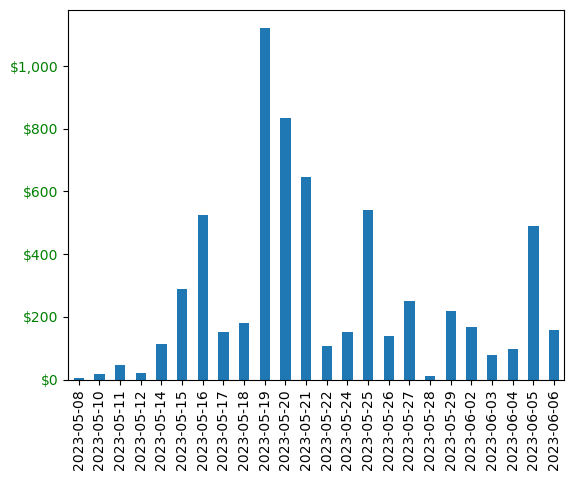

In [7]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


df['Net'].groupby(df['Date'].dt.to_period('D')).sum().plot(kind='bar', xlabel='')

# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## Contributions by initiative

In [8]:
pd.DataFrame(df.groupby('Custom Number').sum('Net').sort_values(by='Net', ascending=False)['Net'])

,Net
Custom Number,
GeneralPage,4447.98
1000DRONES,1263.00
Not specified,398.70
PI:P3955QUGGX35E|PT:DB|CD:GeneralPage,118.27
PI:6S4GY9G8MXRYJ|PT:DB|CD:VictoryDrones,100.00
Veteranius,29.22
MobileShowers,2.91


## Contributions by country

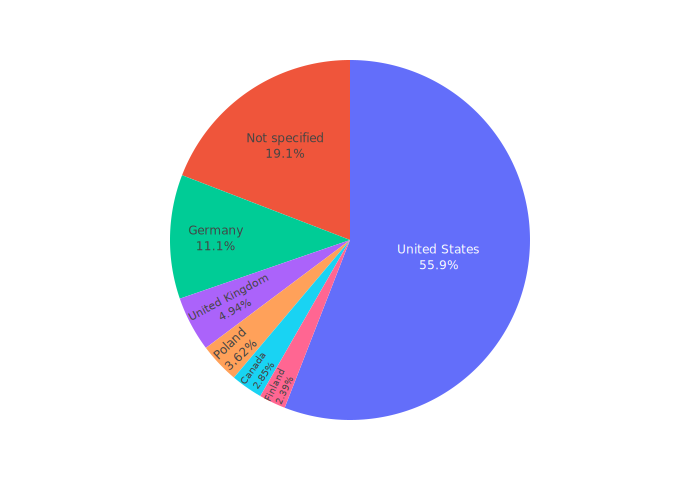

In [9]:
import plotly.io as pio
pio.renderers 
import plotly.express as px

df_country = df.groupby(df['Country'])['Net'].sum().sort_values(ascending=False).head(7).reset_index(name='Net')
fig = px.pie(df_country, values = 'Net', names = 'Country', labels = "Country")
fig.update_traces(textposition='inside', textinfo='percent+label', showlegend = False)
fig.show(renderer='svg')

## Weekly amounts

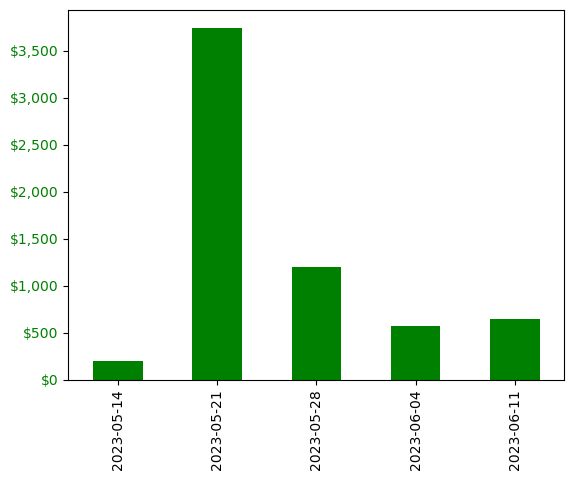

In [10]:
fig, ax = plt.subplots()
df_w = df.groupby([pd.Grouper(key='Date', freq='W')])['Net'].sum()

# remove time from datetime
df_w.index = df_w.index.date

# remove next mo data
#df_w = df_w[:-1]
df_w.plot(kind = 'bar', color = 'green')

# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green')
plt.show()

## Cumulatively raised

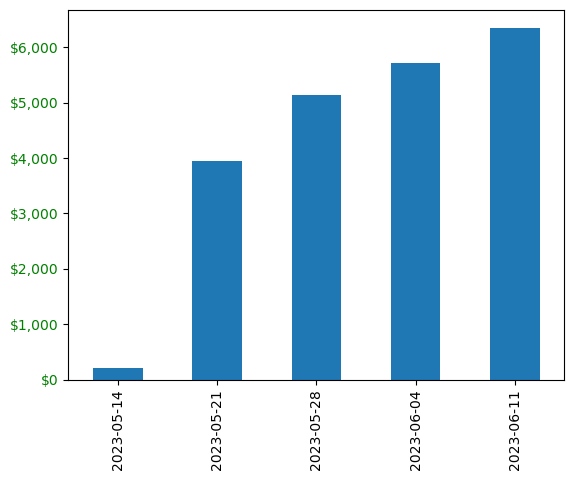

In [11]:
fig, ax = plt.subplots()

df_w.cumsum().plot(kind = 'bar')
# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## We are all united

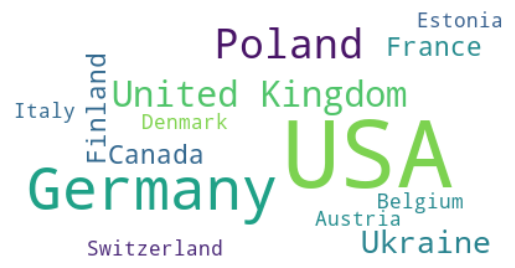

In [12]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

df['Country'] = df['Country'].replace(['United States'], 'USA')
df['Country'] = df['Country'].replace(['New Zealand'], 'NZ')
df['Country'] = df['Country'].replace(['Not specified'], '')
df['Country'] = df['Country'].replace(['Czech Republic'], 'Czech')

text = " ".join(i for i in df['Country'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
#plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Number of countries donations come from

In [13]:
df['Country'].nunique()

15

# And we have regular supporters with subscription amount

In [14]:
'${:,.2f}'.format(df.loc[df['Type'] == 'Subscription Payment', 'Net'].sum().round(2))


'$239.02'

## Most frequent comments

In [28]:
pd.DataFrame(Counter(df['Note'].dropna()).most_common(18), columns=['Note', 'frequency']).style.hide(axis='index')
#df.columns

Note,frequency
Not specified,99
Charitable donation,1
test2,1
Люті Пташки,1
Пташки.,1
Летіть соколи!!! Знищіть усю наволоч з Неньки!!,1
"З днем народження, Маріє�",1
charity,1
Charitable donation to Ukrainian defenders,1
На люті пташки,1


# Are you joining Dignitas Ukraine Donors?!